### Import Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import seaborn as sns

In [2]:
data = pd.read_csv("apple_quality.csv")

In [3]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
data = data.dropna()
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [7]:
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')
data['Quality'] = data['Quality'].map({'good': 1, 'bad': 0})

In [23]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB


### Data Visualization

<Axes: xlabel='Quality', ylabel='count'>

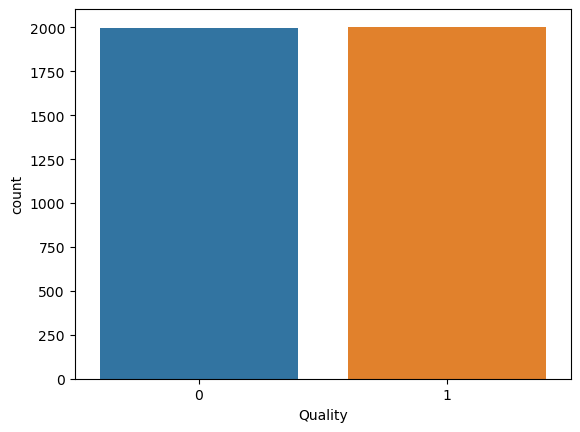

In [8]:
#Visualize distribution of the 'Quality' column
sns.countplot(x='Quality', data=data)

In [9]:
# Features (X) and target (y)
X = data.drop(columns=['Quality'])  # Features
y = data['Quality']  # Target

In [10]:
# Prior probabilities
prior_good = (y == 1).mean()
prior_bad = (y == 0).mean()
print("prior_good: ", prior_good)
print("prior_bad: ", prior_bad)

prior_good:  0.501
prior_bad:  0.499


### Modelling

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Calculate mean and standard deviation for each feature, for each quality class
mean_good = X_train[y_train == 1].mean()
std_good = X_train[y_train == 1].std()

mean_bad = X_train[y_train == 0].mean()
std_bad = X_train[y_train == 0].std()

In [13]:
# Correct NaN values in standard deviations
std_good_filled = std_good.fillna(std_good.mean())
std_bad_filled = std_bad.fillna(std_bad.mean())

In [14]:
# Calculate likelihoods using normal distribution probability density function
likelihood_good = np.prod(norm.pdf(X_test, mean_good, std_good_filled), axis=1)
likelihood_bad = np.prod(norm.pdf(X_test, mean_bad, std_bad_filled), axis=1)

In [15]:
# Apply Bayes' theorem to calculate posterior probabilities
posterior_good = likelihood_good * prior_good
posterior_bad = likelihood_bad * prior_bad

In [16]:
# Make predictions based on the class with the highest posterior probability
predictions = np.where(posterior_good > posterior_bad, 1, 0)

### Validation

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# Model Naive Bayes
model = GaussianNB()

# Make small subset with (folds) by model for cross-validation
k_folds = 5

# Objek KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.765   0.7425  0.7425  0.76375 0.72   ]
Mean CV Score: 0.7467499999999999


### Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions)

# Calculate recall
recall = recall_score(y_test, predictions)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.765
Precision: 0.772609819121447
Recall: 0.7493734335839599
F1-score: 0.7608142493638678


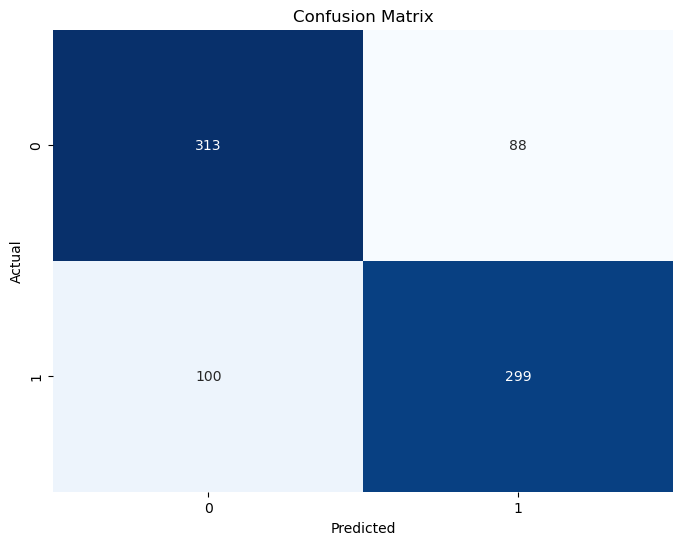

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung matriks confusion
conf_matrix = confusion_matrix(y_test, predictions)

# Membuat heatmap untuk visualisasi matriks confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Visualization Result

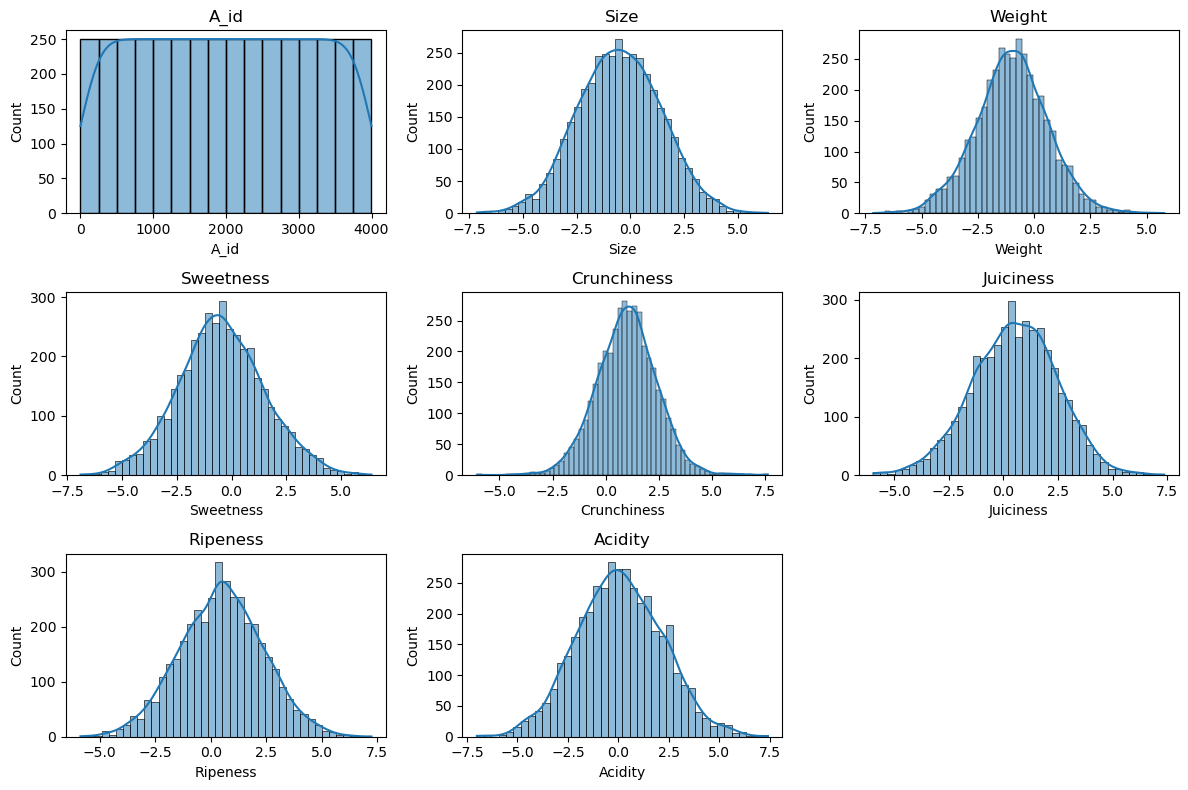

In [20]:
import matplotlib.pyplot as plt

# Plot histogram for each attribute
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


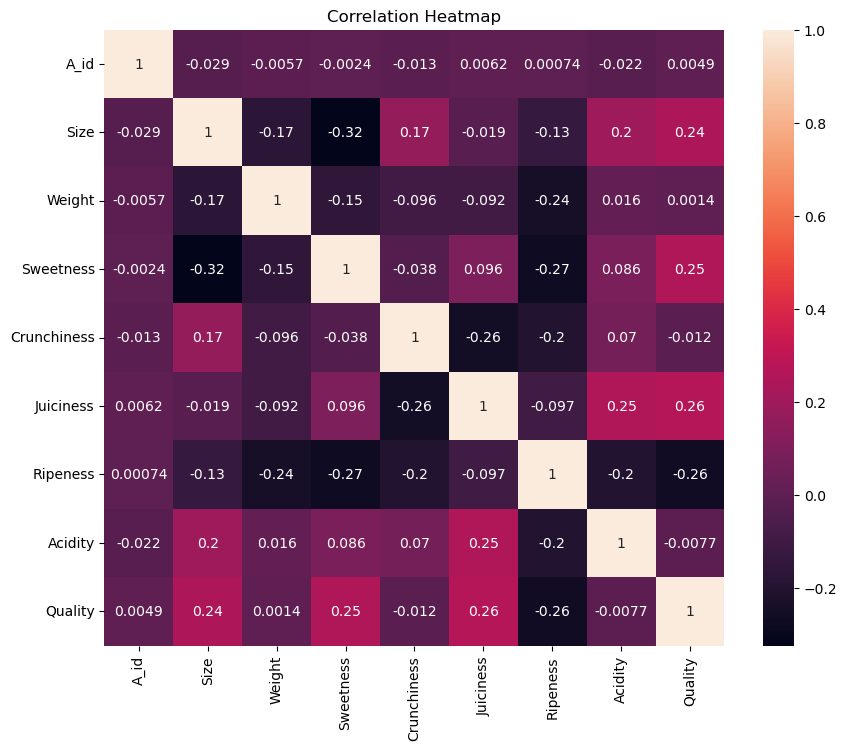

In [21]:
# Plot heatmap of attribute correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


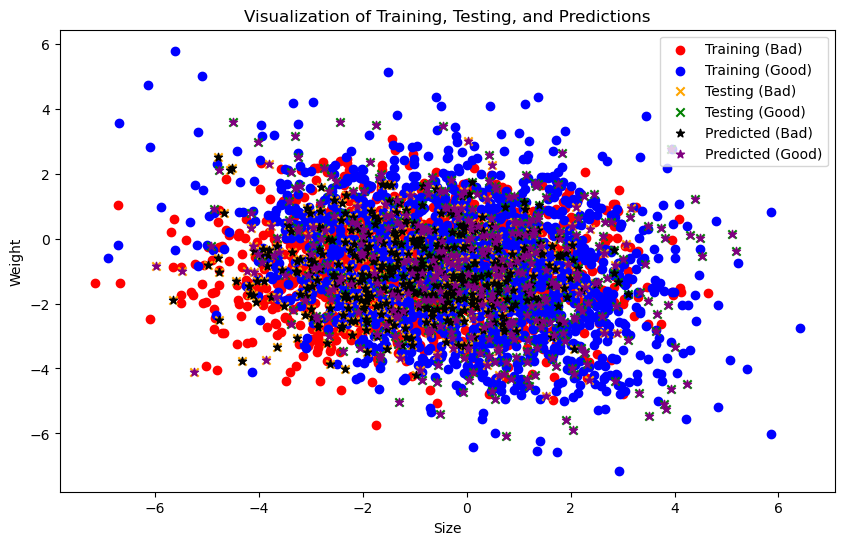

In [22]:
# Visualize training, testing, and predictions
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[y_train == 0]['Size'], X_train[y_train == 0]['Weight'], color='red', label='Training (Bad)')
plt.scatter(X_train[y_train == 1]['Size'], X_train[y_train == 1]['Weight'], color='blue', label='Training (Good)')

# Plot testing data
plt.scatter(X_test[y_test == 0]['Size'], X_test[y_test == 0]['Weight'], color='orange', marker='x', label='Testing (Bad)')
plt.scatter(X_test[y_test == 1]['Size'], X_test[y_test == 1]['Weight'], color='green', marker='x', label='Testing (Good)')

# Plot predicted data
plt.scatter(X_test[predictions == 0]['Size'], X_test[predictions == 0]['Weight'], color='black', marker='*', label='Predicted (Bad)')
plt.scatter(X_test[predictions == 1]['Size'], X_test[predictions == 1]['Weight'], color='purple', marker='*', label='Predicted (Good)')

plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Visualization of Training, Testing, and Predictions')
plt.legend()
plt.show()
